## Stereographic Projection and M&ouml;bius Transformations

We place a sphere of unit diameter with its south pole at $(0,0,-1/2)$ and its north pole at $(0,0,1/2)$ and build a map from the sphere to the complex plane centered at its south pole.

Given a point $p=(u,v,w)$ on the sphere we ask where the line from $(u,v,w)$ through the north pole $(0,0,1/2)$ pierces the complex plane at $(x,iy,-1/2)$.

We begin with the line segment $\ell\equiv\{(tu,tv,1/2+t(w-1/2)):0\le t\le 1\}$ connecting $(0,0,1/2)$ at $t=0$ to $(u,v,w)$ at $t=1$. We then note the height, $1/2+t(w-1/2)$ reaches $-1/2$ when $t=1/(1/2-w)$ and so we land at

\begin{equation}\label{eq:sp0}
  x = \frac{u}{1/2-w} \and y = \frac{v}{1/2-w}
\end{equation}

and denote this $z=x+iy=S(p)$. Now to invert we find 

\begin{equation}\label{eq:sp1}
  u = (1/2-w)x \and v = (1/2-w)y
\end{equation}

and find $w$ via $u^2+v^2+w^2 = 1/4$ brings

\begin{equation}\label{eq:sp2}
  u = \frac{x}{1+x^2+y^2},\hskip 0.25in v = \frac{y}{1+x^2+y^2}, \and w = \frac{x^2+y^2-1}{2(1+x^2+y^2)}
\end{equation}

which we denote $p=S^{-1}z$.


<IPython.core.display.Javascript object>


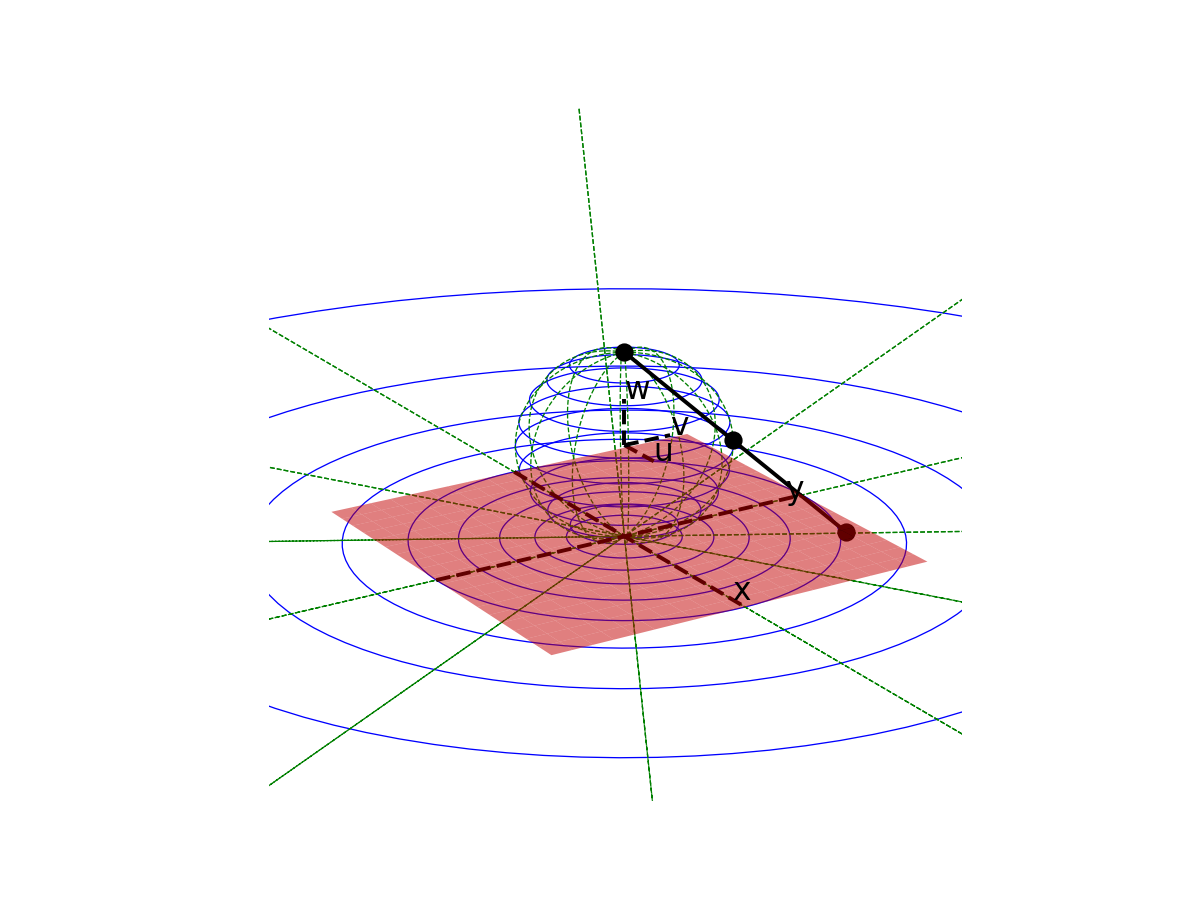

interactive(children=(FloatSlider(value=0.75, description='x', max=1.0, min=-1.0), FloatSlider(value=0.75, des…

In [1]:
# stereographic projection widget in x and y

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

fig = plt.figure(' ') # ,figsize=(6,6))
ax = plt.axes(projection="3d")    # set up for 3D work

# plot the horizontal plane through south pole
x = np.linspace(-1,1,20)
y = np.linspace(-1,1,20)
X, Y = np.meshgrid(x, y)   
Z = (-1/2)*np.ones(X.shape)  
ax.plot_surface(X, Y, Z, alpha = 0.5, color='r') 

# plot lines of latitude
phi = np.linspace(0, 2*np.pi, 100)
for lat in range(-60,75,15):
    theta = (np.pi/180.0)*(90 - lat)*np.ones(phi.size)
    u = (1/2)*np.sin(theta)*np.cos(phi)
    v = (1/2)*np.sin(theta)*np.sin(phi)
    w = (1/2)*np.cos(theta)
    ax.plot(u, v, w, 'b', linewidth=0.5)
    x = u/(1/2-w)
    y = v/(1/2-w)
    z = -(1/2)*np.ones(100)
    ax.plot(x, y, z, 'b', linewidth=0.5)
    
# plot lines of longitude
eps = 1e-6
theta = np.linspace(eps, np.pi-eps, 100)
for long in range(-180,180,30):
    phi = -(np.pi/180.0)*(180 - long)*np.ones(theta.size)
    u = (1/2)*np.sin(theta)*np.cos(phi)
    v = (1/2)*np.sin(theta)*np.sin(phi)
    w = (1/2)*np.cos(theta)
    ax.plot(u, v, w, 'g--', linewidth=0.5)
    x = u/(1/2-w)
    y = v/(1/2-w)
    z = -(1/2)*np.ones(100)
    ax.plot(x, y, z, 'g--', linewidth=0.5)

# plot axes and text
ax.plot([-1,1],[0,0],[-1/2,-1/2],'k--')
ax.text(0.9,0,-1/2,'x',fontsize=12)
ax.plot([0,0],[-1,1],[-1/2,-1/2],'k--')
ax.text(0,0.9,-1/2,'y',fontsize=12)
ax.plot([0,1/4],[0,0],[0,0],'k--')
ax.text(1/4,0,0,'u',fontsize=12)
ax.plot([0,0],[0,1/4],[0,0],'k--')
ax.text(0,1/4,0,'v',fontsize=12)
ax.plot([0,0],[0,0],[0,1/4],'k--')
ax.text(0,0,1/4,'w',fontsize=12)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_box_aspect((2, 2, 0.9))
ax.axis('off')

x = 3/4
y = 3/4
r2 = x**2 + y**2
u = x/(1+r2)
v = y/(1+r2)
w = (r2-1)/2/(1+r2)

ray, = ax.plot([0,u,x],[0,v,y],[1/2,w,-1/2],'ko-')   # the initial ray

def update(x = widgets.FloatSlider(min=-1, max=1, step=0.1, value=3/4), 
           y = widgets.FloatSlider(min=-1, max=1, step=0.1, value=3/4)):
    
    r2 = x**2 + y**2
    u = x/(1+r2)
    v = y/(1+r2)
    w = (r2-1)/2/(1+r2)

    ray.set_data_3d([0,u,x],[0,v,y],[1/2,w,-1/2])
    
    fig.canvas.draw_idle()

interact(update);
    

\begin{myfig}\label{fig:ste} Stereographic Projection. Circles of constant latitude (blue) on the sphere are mapped to concentric circles in the plane. Circles of constant longitude (dashed green) on the sphere are mapped to lines through the origin in the plane. Please use the sliders to map points in the plane onto the sphere. \end{myfig}


We glean from this figure that distances are distorted but angles are preserved.

<IPython.core.display.Javascript object>


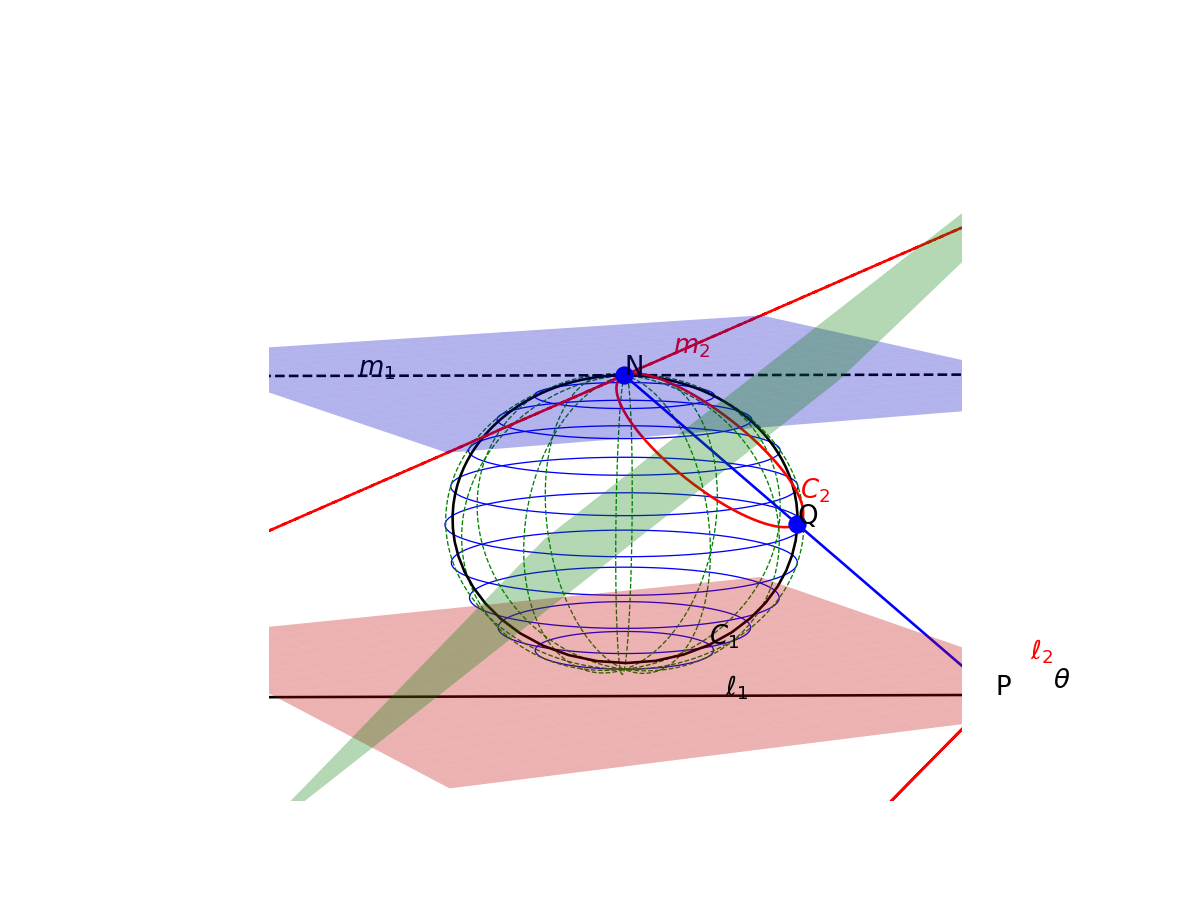

In [1]:
# stereographic projection conformal mapping Fig 2.5, page 36 of Jones & Singerman

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

fig = plt.figure(' ') # ,figsize=(6,6))
ax = plt.axes(projection="3d")    # set up for 3D work

# plot the horizontal planes through  poles
x = np.linspace(-1,1,20)
y = np.linspace(-1,1,20)
X, Y = np.meshgrid(x, y)   
Z = (-1/2)*np.ones(X.shape)  
ax.plot_surface(X, Y, Z, alpha = 0.3, color='r') 
ax.plot_surface(X, Y, Z+1, alpha = 0.3, color='b') 

# plot lines of latitude
phi = np.linspace(0, 2*np.pi, 100)
for lat in range(-60,75,15):
    theta = (np.pi/180.0)*(90 - lat)*np.ones(phi.size)
    u = (1/2)*np.sin(theta)*np.cos(phi)
    v = (1/2)*np.sin(theta)*np.sin(phi)
    w = (1/2)*np.cos(theta)
    ax.plot(u, v, w, 'b', linewidth=0.5)
    
# plot lines of longitude
eps = 1e-6
theta = np.linspace(eps, np.pi-eps, 100)
for long in range(-180,180,30):
    phi = -(np.pi/180.0)*(180 - long)*np.ones(theta.size)
    u = (1/2)*np.sin(theta)*np.cos(phi)
    v = (1/2)*np.sin(theta)*np.sin(phi)
    w = (1/2)*np.cos(theta)
    ax.plot(u, v, w, 'g--', linewidth=0.5)

# plot lines ell1 and ell2 and m1 and m2
x = np.linspace(-20,20,1000)
y = 2*x - 3/4
z = -(1/2)*np.ones(x.size)
ax.plot(x,y,z, 'k', linewidth=1)
ind = 510
ax.text(x[ind],y[ind],z[ind],'$\ell_1$')
ax.text(12/16,15/16,-1/2,'$\\theta$')
ax.plot(x-3/4,y-3/4,z+1, 'k--', linewidth=1)
ax.text(x[ind]-3/4,y[ind]-3/4,z[ind]+1,'$m_1$')
r2 = x**2 + y**2
u = x/(1+r2)
v = y/(1+r2)
w = (r2-1)/2/(1+r2)
ax.plot(u, v, w, 'k', linewidth=1)
ax.text(u[ind],v[ind],w[ind],'$C_1$')

y = -x + 3/2
z = -(1/2)*np.ones(x.size)
ax.plot(x,y,z, 'r', linewidth=1)
ax.text(x[ind],y[ind],z[ind],'$\ell_2$',color='r')
ax.plot(x-3/4,y-3/4,z+1, 'r--', linewidth=1)
ax.text(x[ind]-3/4,y[ind]-3/4,z[ind]+1,'$m_2$',color='r')
r2 = x**2 + y**2
u = x/(1+r2)
v = y/(1+r2)
w = (r2-1)/2/(1+r2)
ax.plot(u, v, w, 'r', linewidth=1)
ax.text(u[ind],v[ind],w[ind],'$C_2$',color='r')

# plot ray NQP
x = 3/4
y = 3/4
r2 = x**2 + y**2
u = x/(1+r2)
v = y/(1+r2)
w = (r2-1)/2/(1+r2)
ray = ax.plot([0,u,x],[0,v,y],[1/2,w,-1/2],'bo-',linewidth=1)

# plot plane that is perp bisector of NQ
N = np.array([0,0,1/2])
ax.text(N[0],N[1],N[2],'N')
Q = np.array([u,v,w])
ax.text(Q[0],Q[1],Q[2],'Q')
ax.text(x,y,-1/2,'P')
M = (N+Q)/2
u = np.linspace(-1,1,20)
v = np.linspace(-1,1,20)
U, V = np.meshgrid(u, v)   
W = (Q[0]*U + Q[1]*V)/(1/2-Q[2])  
ax.plot_surface(U+M[0], V+M[1], W+M[2], alpha = 0.3, color='g') 

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_box_aspect((2, 2, 2.5))
ax.axis('off');

\begin{myfig}\label{fig:conformal} The straight lines $\ell_1$ (black) and $\ell_2$ (red) meet at $P$ at angle $\theta$. The extended lines $L_j\equiv \ell_j\cup\{\infty\}$ are carried by $\psi^{-1}$ to the red and black circles on the sphere $S^2$. \end{myfig}

We now note that each rotation matrix takes a point on the sphere to a point on the sphere, say $\hat p=R(a,\phi)p$. It follows then that $z=x+iy$ is transformed to the new complex point

\begin{equation}\label{eq:zhat0}
  \hat z = S(R(a,\phi)S^{-1}(z))
\end{equation}

Let's take a closer look. When the axis of rotation is the vertical axis $e_w$ we find

\begin{equation}\label{eq:zhat1}
  \eqalign{
  \hat z &= S\left(\begin{pmatrix} \cos(\phi) & -\sin(\phi) & 0 \\ \sin(\phi) & \cos(\phi) & 0 \\ 0 & 0 & 1 \end{pmatrix}\begin{pmatrix} x/(1+|z|^2) \\ y/(1+|z|^2) \\ (|z|^2-1)/(|z|^2+1)/2 \end{pmatrix}\right) \cr
  &= S\begin{pmatrix} (x\cos(\phi)-y\sin(\phi))/(1+|z|^2) \\ (x\sin(\phi)+y\cos(\phi))/(1+|z|^2) \\ (|z|^2-1)/(|z|^2+1)/2 \end{pmatrix} \cr
  &= (x\cos(\phi)-y\sin(\phi)) + i(x\sin(\phi)+y\sin(\phi)) \cr
  &= \exp(i\phi)z \cr}
\end{equation}

We recognize this as the M&ouml;bius Transformation

\begin{equation}\label{eq:Mobz}
  \mu(z) = \frac{\exp(i\phi/2)z}{\exp(-i\phi/2)}
      \hskip 0.25in \hbox{and associated matrix} \hskip 0.25in 
    M = \begin{pmatrix}\exp(i\phi/2) & 0 \\ 0 & \exp(-i\phi/2)\end{pmatrix}
\end{equation}


If we next rotate by $\theta$ about the $u$-axis then, arguing as above, this amounts to

\begin{equation}\label{eq:zhat2}
  \hat\zeta = \exp(i\theta)\zeta \where \zeta = \frac{v+iw}{1/2-u}
\end{equation}

It remains then to express $\zeta$ and $\hat\zeta$ in terms of $z$ and $\hat z$. Toward that end we note that

\begin{equation}\label{eq:zhat3}
  \frac{\zeta+i}{\zeta-i} =  \frac{\frac{v+iw}{1/2-u}+i}{\frac{v+iw}{1/2-u}-i} = \frac{-(u+iv)+(1/2-w)}{(u-iv)-(1/2-w)}
\end{equation}

We now "recall" that

\begin{equation}\label{eq:zhat4}
  z = x+iy = \frac{u+iv}{1/2-w} = \frac{1/2+w}{u-iv}
\end{equation}

and so (\ref{eq:zhat3}) reads

\begin{equation}\label{eq:zhat5}
  \frac{\zeta+i}{\zeta-i} =  \frac{-z(1/2-w)+(1/2+w)}{(1/z)(1/2+w)-(1/2-w)} = z
\end{equation}

and so

\begin{equation}\label{eq:zhat6}
  \zeta = \frac{-iz -i}{1-z} 
\end{equation}



and similarly

\begin{equation}\label{eq:zhat7}
  \hat z = \frac{\hat\zeta+i}{\hat\zeta-i} =  \frac{\exp(i\theta)\zeta+i}{\exp(i\theta)\zeta-i}
\end{equation}